In [1]:
import pandas as pd
import numpy as np
import os,sys

from scipy.stats import pearsonr
from scipy.stats import spearmanr
import scipy.stats as stats

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

from importlib import reload
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
import seaborn as sns

from scipy.stats import mannwhitneyu

%matplotlib inline

sns.set(style="white")
pd.set_option('display.max_columns', None)

In [2]:
perid = pd.read_csv('../../output/perid_plot.csv')


perid.rename(columns = {'min_miDockQ':'min $DockQ_{i}$', 'max_miDockQ':'max $DockQ_{i}$','avg_miDockQ':'avg $DockQ_{i}$', 
                        'min_pwDockQ':'min $DockQ_{ij}$', 'max_pwDockQ':'max $DockQ_{ij}$','avg_pwDockQ':'avg $DockQ_{ij}$',
                        'min_pDockQ':'min pDockQ','min_pmiDockQ':'min $pDockQ_{i}$' }, inplace = True)

perid.head(5)

pdbid  num_chains    class  MMscore  RMSD    pTM   ipTM Symmetry  \
0  5mlq           2  homomer  0.97785  1.20  0.866  0.851       C2   
1  5nl6           2  homomer  0.95927  1.62  0.834  0.818       C2   
2  5od9           2  homomer  0.58725  3.72  0.445  0.223       C2   
3  5ow2           2  homomer  0.85494  2.28  0.671  0.662       C2   
4  5w4a           2  homomer  0.93889  1.99  0.870  0.796       C2   

   min $DockQ_{ij}$  avg $DockQ_{ij}$  max $DockQ_{ij}$  min $DockQ_{i}$  \
0             0.913             0.913             0.913            0.913   
1             0.660             0.660             0.660            0.660   
2             0.059             0.059             0.059            0.059   
3             0.617             0.617             0.617            0.617   
4             0.661             0.661             0.661            0.661   

   avg $DockQ_{i}$  max $DockQ_{i}$  min_interPAE  min pDockQ  \
0            0.913            0.913      8.894755    0.459902   
1            0.660            0.660      6.939106    0.452864   
2            0.059            0.059     18.369370    0.076469   
3            0.617            0.617     14.842103    0.517812   
4            0.661            0.661      7.369001    0.402802   

   min $pDockQ_{i}$  
0          0.900757  
1          0.641370  
2          0.022005  
3          0.434434  
4          0.621381

In [3]:
perchain = pd.read_csv('../../output/perchain_plot.csv')

perchain.rename(columns = {'miDockQ':'$DockQ_{i}$', 'pwDockQ':'$DockQ_{ij}$', 'pmiDockQ':'$pDockQ_{i}$' }, inplace = True)

perchain.head(5)

pdbid  num_chains    class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
0  5mlq           2  homomer      A        0.913         0.913   
1  5mlq           2  homomer      B        0.913         0.913   
2  5nl6           2  homomer      A        0.660         0.660   
3  5nl6           2  homomer      B        0.660         0.660   
4  5od9           2  homomer      A        0.059         0.059   

   Fnat_native_contacts   IF_plDDT   interPAE    pDockQ  $pDockQ_{i}$  
0                    42  97.274412   8.898357  0.459902      0.900757  
1                    42  97.274412   8.894755  0.459902      0.900757  
2                    95  90.246667   6.939106  0.452864      0.641370  
3                    95  90.246667   6.949329  0.452864      0.641370  
4                    44  63.968125  18.409119  0.076469      0.022005

In [14]:
perid_above2 = perid[perid['num_chains']>2]
perchain_above2 = perchain[perchain['num_chains']>2]

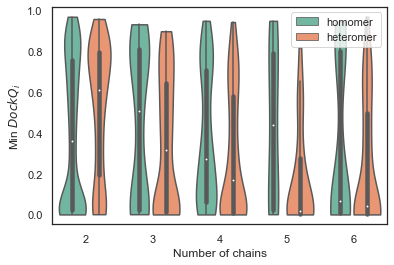

In [9]:
sns.violinplot(x="num_chains", y="min $DockQ_{i}$", hue='class', hue_order=['homomer','heteromer'], cut=0, data=perid,palette='Set2') #inner="points"
plt.legend()
plt.xlabel("Number of chains")
plt.ylabel("Min $DockQ_{i}$")
plt.savefig('../../../../fig2.jpg',dpi=300)
plt.show()

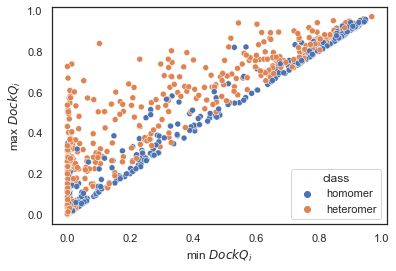

In [26]:
def corrfunc(x, y, ax=None, **kws):
    r, _ = spearmanr(x, y)
    label = r'$\rho$='+ str(round(r, 3))
    ax = plt.gca()
    #pos = (.6, .1 - .1*n)
    ax.set_aspect('equal', adjustable='box')
    pos = (0.05,0.87) if kws['label'] == 'homomer' else (0.05,0.95)
    ax.annotate("{}:{}".format(kws['label'],label), xy = pos, size = 12, xycoords = ax.transAxes)

dfm_select = perid[['min $DockQ_{i}$', 'max $DockQ_{i}$','class']]

sns.scatterplot(data=perid_above2, x='min $DockQ_{i}$', y='max $DockQ_{i}$',hue='class')
plt.savefig('../../../../fig3.jpg',dpi=300)
plt.show()

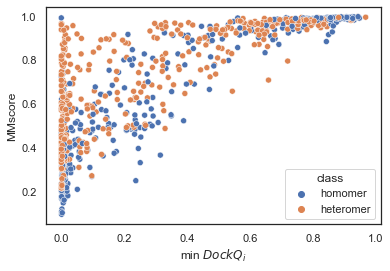

In [35]:
sns.scatterplot(data=perid_above2, x='min $DockQ_{i}$', y='MMscore',hue='class')
plt.savefig('../../../../fig5.jpg',dpi=300)
plt.show()

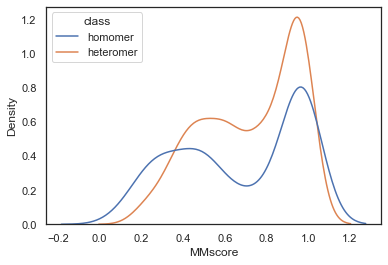

In [38]:
sns.kdeplot(data=perid_above2, x='MMscore',hue='class')
plt.savefig('../../../../fig6.jpg',dpi=300)
plt.show()

In [43]:
perid[(perid['min $DockQ_{i}$']<=0.23)&(perid['MMscore']>=0.5)]
perid

pdbid  num_chains      class  MMscore  RMSD    pTM   ipTM Symmetry  \
0     5mlq           2    homomer  0.97785  1.20  0.866  0.851       C2   
1     5nl6           2    homomer  0.95927  1.62  0.834  0.818       C2   
2     5od9           2    homomer  0.58725  3.72  0.445  0.223       C2   
3     5ow2           2    homomer  0.85494  2.28  0.671  0.662       C2   
4     5w4a           2    homomer  0.93889  1.99  0.870  0.796       C2   
...    ...         ...        ...      ...   ...    ...    ...      ...   
1923  7v5y           6  heteromer  0.63836  4.24  0.616  0.559       C2   
1924  7vgs           6  heteromer  0.43805  5.98  0.488  0.405       C2   
1925  7vlx           6  heteromer  0.75638  5.77  0.857  0.857       C3   
1926  7w54           6  heteromer  0.22624  4.61  0.322  0.185       C1   
1927  7xq8           6  heteromer  0.27042  8.76  0.331  0.283       C1   

      min $DockQ_{ij}$  avg $DockQ_{ij}$  max $DockQ_{ij}$  min $DockQ_{i}$  \
0                0.913          0.913000             0.913            0.913   
1                0.660          0.660000             0.660            0.660   
2                0.059          0.059000             0.059            0.059   
3                0.617          0.617000             0.617            0.617   
4                0.661          0.661000             0.661            0.661   
...                ...               ...               ...              ...   
1923             0.020          0.312600             0.818            0.027   
1924             0.012          0.168111             0.811            0.010   
1925             0.257          0.387667             0.571            0.375   
1926             0.001          0.005625             0.029            0.002   
1927             0.005          0.173000             0.555            0.097   

      avg $DockQ_{i}$  max $DockQ_{i}$  min_interPAE  min pDockQ  \
0            0.913000            0.913      8.894755    0.459902   
1            0.660000            0.660      6.939106    0.452864   
2            0.059000            0.059     18.369370    0.076469   
3            0.617000            0.617     14.842103    0.517812   
4            0.661000            0.661      7.369001    0.402802   
...               ...              ...           ...         ...   
1923         0.351500            0.533      0.370478    0.375268   
1924         0.104444            0.274      0.224327    0.454179   
1925         0.400833            0.427      0.565236    0.672772   
1926         0.004313            0.012     -0.056362    0.012720   
1927         0.141938            0.279     -0.019401    0.230599   

      min $pDockQ_{i}$  
0             0.900757  
1             0.641370  
2             0.022005  
3             0.434434  
4             0.621381  
...                ...  
1923          0.038496  
1924          0.056002  
1925          0.507761  
1926          0.007325  
1927          0.143792  

[1928 rows x 17 columns]